# Import library

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
import statsmodels.api as sm

# Import dataset

In [56]:
 # EUR - VND
eur = pd.read_csv('EUR.csv')
 # GBP - VND
gbp = pd.read_csv("GBP.csv")
 # JPY - VND
jpy = pd.read_csv("JPY.csv")
# Convert
eur = eur['Sale'].replace({',':''}, regex=True).astype(float)
gbp = gbp['Sale'].replace({',':''}, regex=True).astype(float)
jpy = jpy['Sale'].replace({',':''}, regex=True).astype(float)

# Split train, test

In [57]:
# Split train, test data
#### EUR - VND
  # case 1. 7:3
train_eur_1 = eur[:int(0.7*len(eur))]
test_eur_1 = eur[int(0.7*len(eur)):]
  # case 2. 8:2
train_eur_2 = eur[:int(0.8*len(eur))]
test_eur_2 = eur[int(0.8*len(eur)):]
  # case 3. 9:1
train_eur_3 = eur[:int(0.9*len(eur))]
test_eur_3 = eur[int(0.9*len(eur)):]

#### GBP - VND
  # case 1. 7:3
train_gbp_1 = gbp[:int(0.7*len(gbp))]
test_gbp_1 = gbp[int(0.7*len(gbp)):]
  # case 2. 8:2
train_gbp_2 = gbp[:int(0.8*len(gbp))]
test_gbp_2 = gbp[int(0.8*len(gbp)):]
  # case 3. 9:1
train_gbp_3 = gbp[:int(0.9*len(gbp))]
test_gbp_3 = gbp[int(0.9*len(gbp)):]

#### JPY - VND
  # case 1. 7:3
train_jpy_1 = jpy[:int(0.7*len(jpy))]
test_jpy_1 = jpy[int(0.7*len(jpy)):]
  # case 2. 8:2
train_jpy_2 = jpy[:int(0.8*len(jpy))]
test_jpy_2 = jpy[int(0.8*len(jpy)):]
  # case 3. 9:1
train_jpy_3 = jpy[:int(0.9*len(jpy))]
test_jpy_3 = jpy[int(0.9*len(jpy)):]

# Evaluate model

In [58]:
def accuracy(forecast, actual):
    forecast = np.array(forecast)
    actual = np.array(actual)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    print('RMSE =',rmse)
    print('MAPE =',mape)
    print('MAE =',mae)

# ETS (Exponential Smoothing)

In [59]:
# Choose ETS model
trends = ['add', 'mul']
seasonals = ['add', 'mul']
def choose_ets_model(data):
    results = []
    for trend in trends:
        for seasonal in seasonals:
            try:
                model = sm.tsa.ExponentialSmoothing(data, trend=trend, seasonal=seasonal, seasonal_periods=12)
                # Fit the model
                fit_model = model.fit()

                results.append({
                    'Trend': trend,
                    'Seasonal': seasonal,
                    'AIC': fit_model.aic,
                    'BIC': fit_model.bic,
                    'Model': fit_model
                })
            except Exception as e:
                print(f"Failed to fit model with Trend: {trend}, Seasonal: {seasonal}")
    return results

# Find the best model based on AIC and BIC
results=choose_ets_model(eur)

for result in results:
    print(f"Trend: {result['Trend']}, Seasonal: {result['Seasonal']}, AIC: {result['AIC']:<10.4f},  BIC: {result['BIC']:<10.4f}")
if results:
    best_model_aic = min(results, key=lambda x: x['AIC'])
    best_model_bic = min(results, key=lambda x: x['BIC'])

    print("\nBest model based on AIC:")
    print(f"Trend: {best_model_aic['Trend']}, Seasonal: {best_model_aic['Seasonal']}, AIC: {best_model_aic['AIC']:<10.4f}")

    print("\nBest model based on BIC:")
    print(f"Trend: {best_model_bic['Trend']}, Seasonal: {best_model_bic['Seasonal']}, BIC: {best_model_bic['BIC']:<10.4f}")



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Trend: add, Seasonal: add, AIC: 17788.7978,  BIC: 17877.7591
Trend: add, Seasonal: mul, AIC: 17808.0963,  BIC: 17897.0576
Trend: mul, Seasonal: add, AIC: 17807.5581,  BIC: 17896.5194
Trend: mul, Seasonal: mul, AIC: 17808.4573,  BIC: 17897.4186

Best model based on AIC:
Trend: add, Seasonal: add, AIC: 17788.7978

Best model based on BIC:
Trend: add, Seasonal: add, BIC: 17877.7591


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [60]:
# After choosing suitable model, define function to build
def build_model(data):
  model = ExponentialSmoothing(data,trend='add', seasonal='add', seasonal_periods=12).fit()
  return model

In [61]:
def forecast_days(train, predicted_test):
    train_predicted = np.concatenate([train, predicted_test])
    
    # Forecase next 30 days
    model_30 = ExponentialSmoothing(train_predicted, trend='add', seasonal='add', seasonal_periods=12).fit()
    forecast30 = model_30.forecast(steps=30)
    train_predicted_30 = np.concatenate([train_predicted, forecast30])
    
    # Forecast the next 60 days
    model_60 = ExponentialSmoothing(train_predicted_30, trend='add', seasonal='add', seasonal_periods=12).fit()
    forecast60 = model_60.forecast(steps=30)
    train_predicted_60 = np.concatenate([train_predicted_30, forecast60])
    
    # Forecast the next 90 days
    model_90 = ExponentialSmoothing(train_predicted_60, trend='add', seasonal='add', seasonal_periods=12).fit()
    forecast90 = model_90.forecast(steps=30)
    
    return forecast30, forecast60, forecast90

# Define function predict next 30, 60, 90 days
def predict_data_ETS(model, train, test):
  pre_test= model.predict(start=len(train), end=len(train) + len(test) - 1)
  forecast30, forecast60, forecast90 = forecast_days(train, pre_test)
  return pre_test, forecast30, forecast60, forecast90

In [62]:
# Build model
model_eur_1 = build_model(train_eur_1)
model_eur_2 = build_model(train_eur_2)
model_eur_3 = build_model(train_eur_3)

model_jpy_1 = build_model(train_jpy_1)
model_jpy_2 = build_model(train_jpy_2)
model_jpy_3 = build_model(train_jpy_3)

model_gbp_1 = build_model(train_gbp_1)
model_gbp_2 = build_model(train_gbp_2)
model_gbp_3 = build_model(train_gbp_3)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [63]:
def visualise_ETS_model(train, test, pre_test, f30, f60, f90):
    # Visualization
    plt.figure(figsize=(12, 6))

    start_date = pd.to_datetime('3/1/2019')
    # end_date = pd.to_datetime('3/1/2024')
    end_date_fc = pd.to_datetime('9/1/2024')

    index = pd.date_range(start=start_date, end=end_date_fc, freq='D')
    
    unique_years = index.year.unique()
    x_ticks = [pd.to_datetime(str(year)) for year in unique_years]
    
    plt.xticks(x_ticks, unique_years)    

    train_index = index[:len(train)]
    test_index = index[len(train): len(train) + len(test)]
    f30_index = index[len(train) + len(test): len(train) + len(test) + 30]
    f60_index = index[len(train) + len(test) + 30: len(train) + len(test) + 60]
    f90_index = index[len(train) + len(test) + 60: len(train) + len(test) + 90]

    plt.plot(train_index, train, label='Train', color='blue')
    plt.plot(test_index, test, label='Actual Test', color='orange')
    plt.plot(test_index, pre_test, label='Prediction Test', color='green')

    plt.plot(f30_index, f30, label='Forecast next 30 days', color='red')
    plt.plot(f60_index, f60, label='Forecast next 60 days', color='purple')
    plt.plot(f90_index, f90, label='Forecast next 90 days', color='pink')
    
    plt.title('ETS Time Series Forecast')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate (VND)')
    plt.legend()
    
    plt.show()

**EUR_VND**

* Case 7:3

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


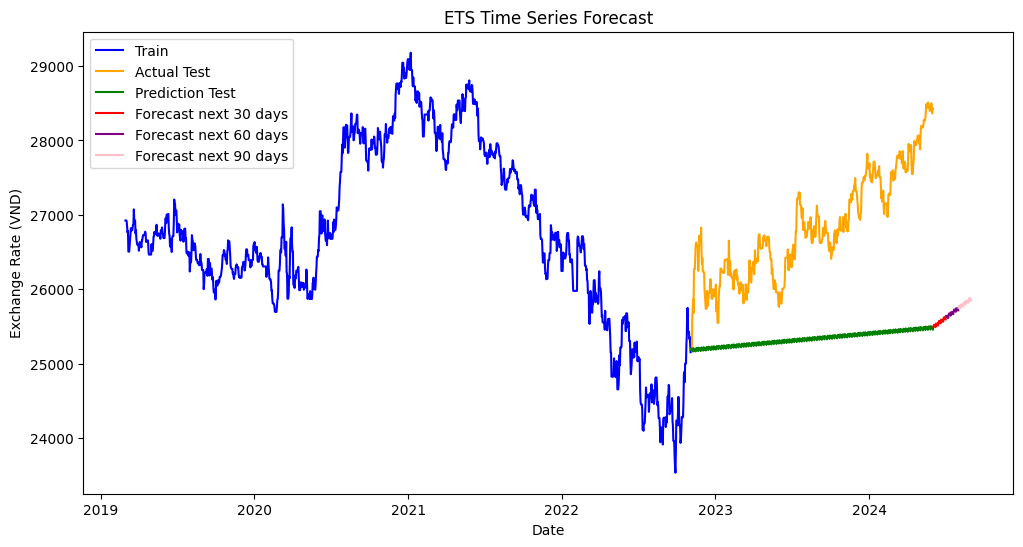

Model accuracy (EUR - 7:3)
RMSE = 1631.7533338587473
MAPE = 5.547403004064819
MAE = 1504.4534279502627


In [64]:
predict_test_eur_1, forecast_eur_1_30, forecast_eur_1_60, forecast_eur_1_90 = predict_data_ETS(model_eur_1, train_eur_1, test_eur_1)
visualise_ETS_model(train_eur_1,test_eur_1,predict_test_eur_1,forecast_eur_1_30, forecast_eur_1_60, forecast_eur_1_90)

print('Model accuracy (EUR - 7:3)')
accuracy(predict_test_eur_1, test_eur_1)

* Case 8:2

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


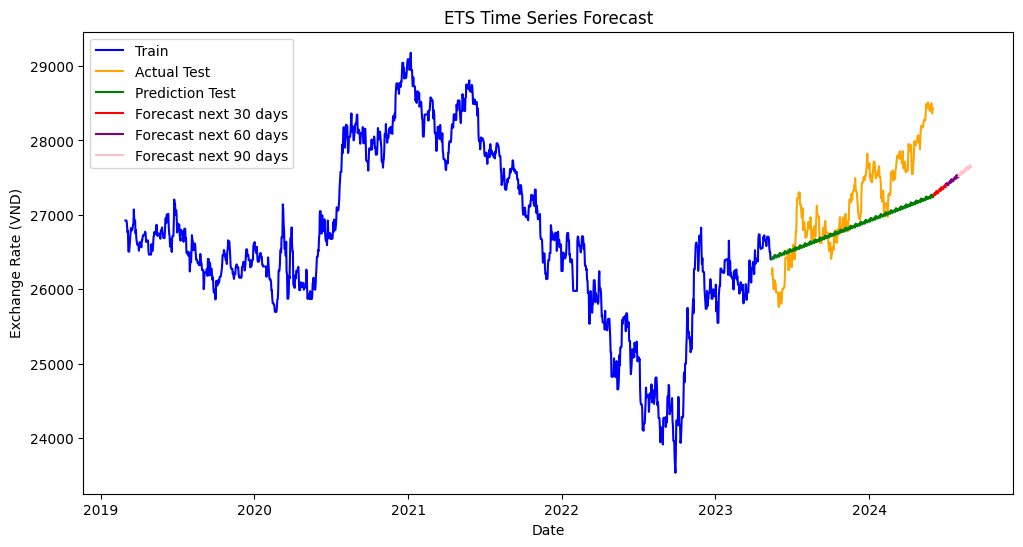

Model accuracy (EUR - 8:2)
RMSE = 532.5824811706046
MAPE = 1.5498619587187499
MAE = 426.1053023156781


In [65]:
predict_test_eur_2, forecast_eur_2_30, forecast_eur_2_60, forecast_eur_2_90 = predict_data_ETS(model_eur_2, train_eur_2, test_eur_2)
visualise_ETS_model(train_eur_2,test_eur_2,predict_test_eur_2,forecast_eur_2_30, forecast_eur_2_60, forecast_eur_2_90)

print('Model accuracy (EUR - 8:2)')
accuracy(predict_test_eur_2, test_eur_2)

* Case 9:1

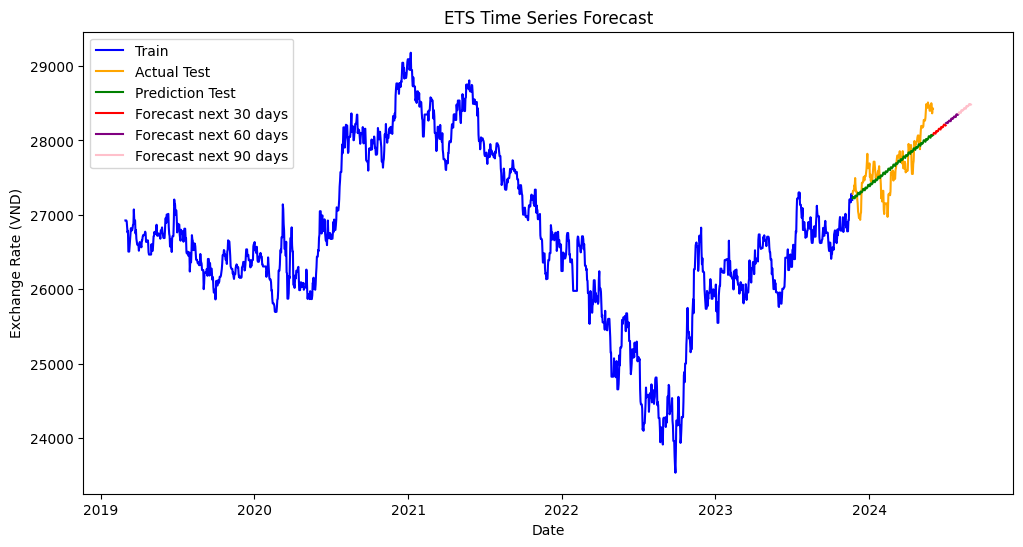

Model accuracy (EUR - 9:1)
RMSE = 236.53557346432626
MAPE = 0.6958919354691897
MAE = 192.59323549647638


In [66]:
predict_test_eur_3, forecast_eur_3_30, forecast_eur_3_60, forecast_eur_3_90 = predict_data_ETS(model_eur_3, train_eur_3, test_eur_3)
visualise_ETS_model(train_eur_3,test_eur_3,predict_test_eur_3,forecast_eur_3_30, forecast_eur_3_60, forecast_eur_3_90)

print('Model accuracy (EUR - 9:1)')
accuracy(predict_test_eur_3, test_eur_3)

**JPY_VND**

* Case 7:3

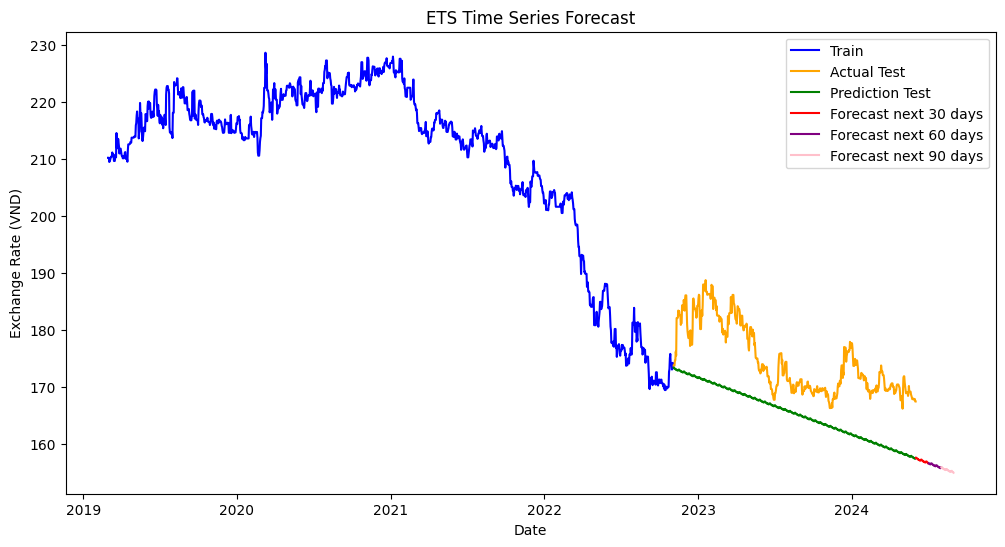

Model accuracy (JPY - 7:3)
RMSE = 10.053560263671521
MAPE = 5.298179230691967
MAE = 9.326342328296974


In [67]:
predict_test_jpy_1, forecast_jpy_1_30, forecast_jpy_1_60, forecast_jpy_1_90 = predict_data_ETS(model_jpy_1, train_jpy_1, test_jpy_1)
visualise_ETS_model(train_jpy_1,test_jpy_1,predict_test_jpy_1,forecast_jpy_1_30, forecast_jpy_1_60, forecast_jpy_1_90)

print('Model accuracy (JPY - 7:3)')
accuracy(predict_test_jpy_1, test_jpy_1)

* Case 8:2

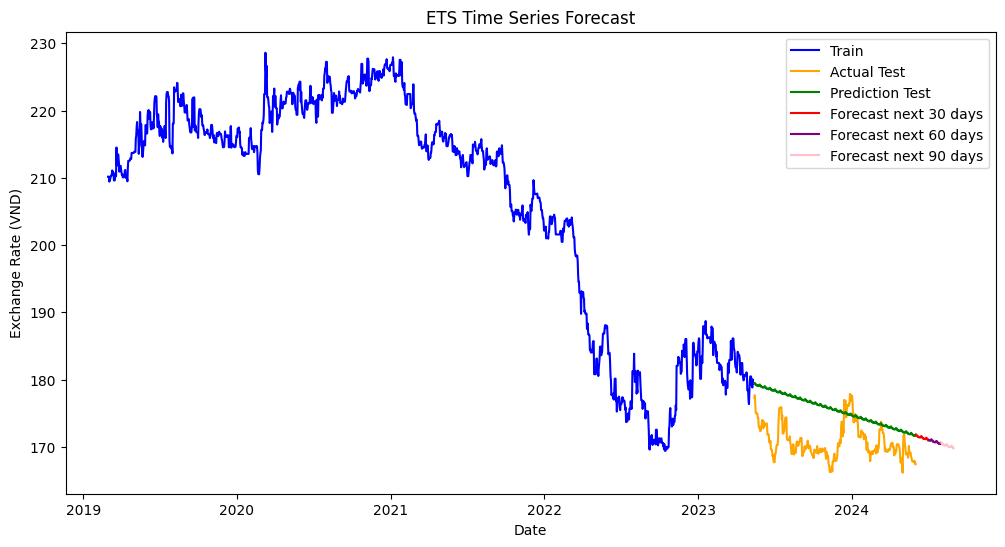

Model accuracy (JPY - 8:2)
RMSE = 5.459033165020953
MAPE = 2.8527130893358246
MAE = 4.851955130423599


In [68]:
predict_test_jpy_2, forecast_jpy_2_30, forecast_jpy_2_60, forecast_jpy_2_90 = predict_data_ETS(model_jpy_2, train_jpy_2, test_jpy_2)
visualise_ETS_model(train_jpy_2,test_jpy_2,predict_test_jpy_2,forecast_jpy_2_30, forecast_jpy_2_60, forecast_jpy_2_90)

print('Model accuracy (JPY - 8:2)')
accuracy(predict_test_jpy_2, test_jpy_2)

* Case 9:1

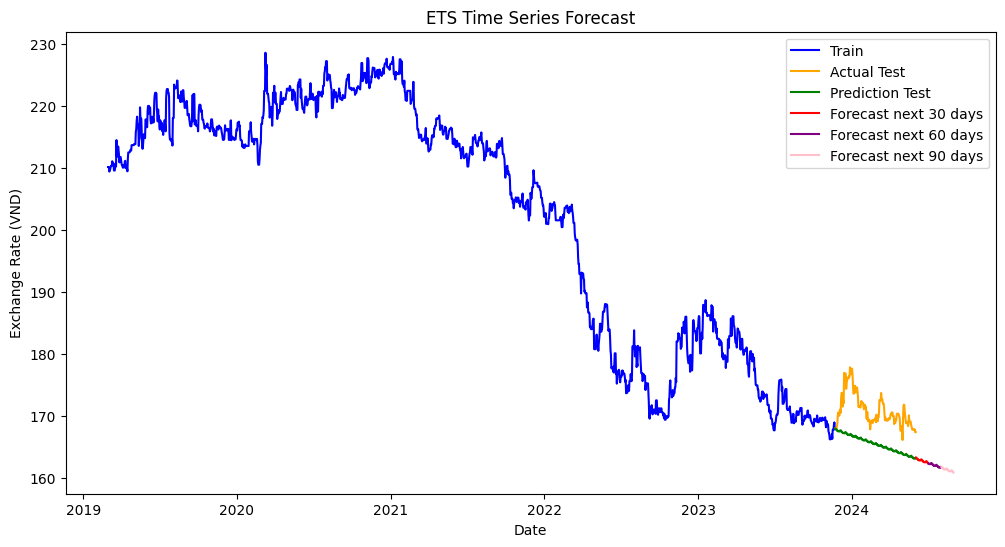

Model accuracy (JPY - 9:1)
RMSE = 5.883471899792996
MAPE = 3.1940667192878665
MAE = 5.48826515813657


In [69]:
predict_test_jpy_3, forecast_jpy_3_30, forecast_jpy_3_60, forecast_jpy_3_90 = predict_data_ETS(model_jpy_3, train_jpy_3, test_jpy_3)
visualise_ETS_model(train_jpy_3,test_jpy_3,predict_test_jpy_3,forecast_jpy_3_30, forecast_jpy_3_60, forecast_jpy_3_90)

print('Model accuracy (JPY - 9:1)')
accuracy(predict_test_jpy_3, test_jpy_3)

**GBP_VND**

* Case 7:3

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


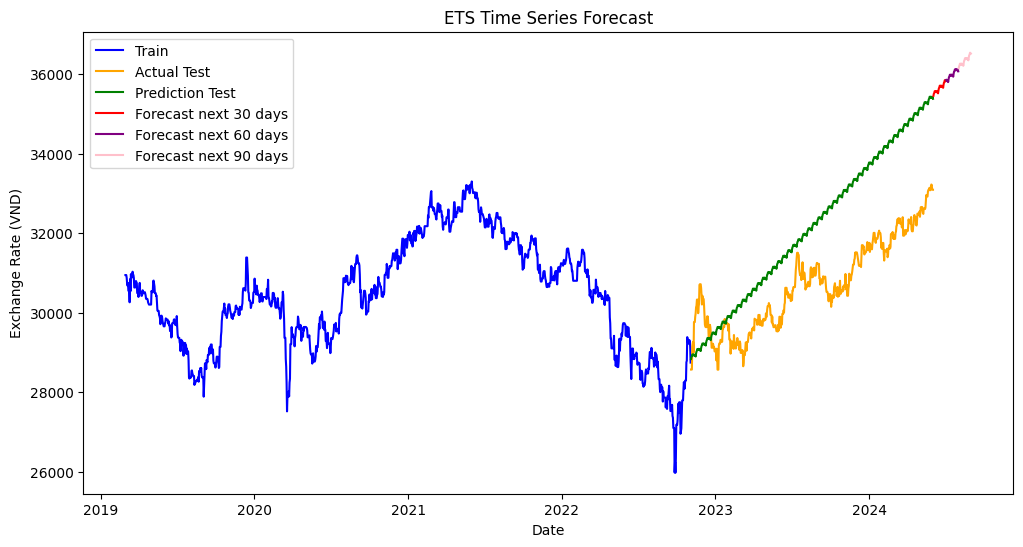

Model accuracy (GBP - 7:3)
RMSE = 1751.4615970483046
MAPE = 5.04912249355161
MAE = 1569.8551868489421


In [70]:
predict_test_gbp_1, forecast_gbp_1_30, forecast_gbp_1_60, forecast_gbp_1_90 = predict_data_ETS(model_gbp_1, train_gbp_1, test_gbp_1)
visualise_ETS_model(train_gbp_1,test_gbp_1,predict_test_gbp_1,forecast_gbp_1_30, forecast_gbp_1_60, forecast_gbp_1_90)

print('Model accuracy (GBP - 7:3)')
accuracy(predict_test_gbp_1, test_gbp_1)

* Case 8:2

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


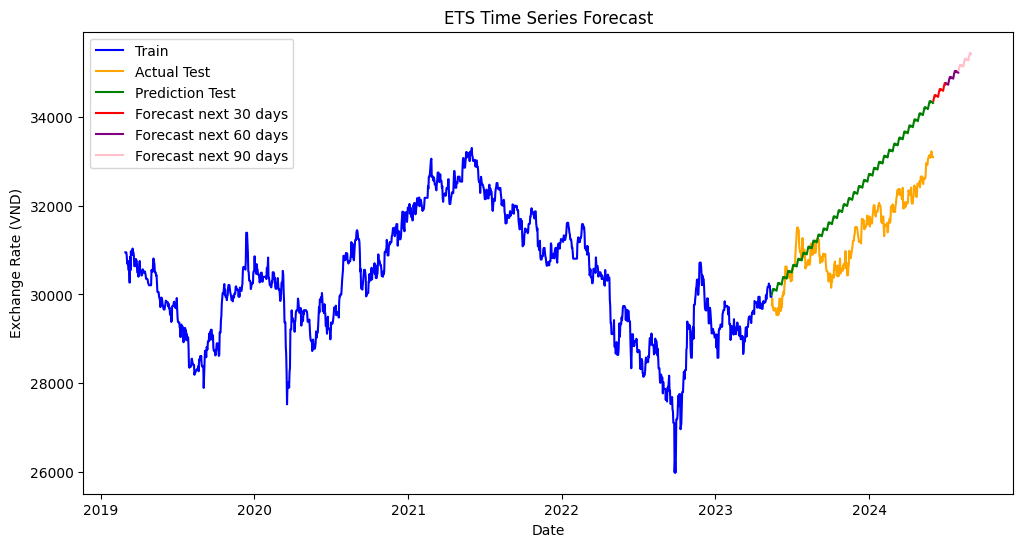

Model accuracy (GBP - 8:2)
RMSE = 1081.9200695627442
MAPE = 3.019465393901538
MAE = 952.1275354325627


In [71]:
predict_test_gbp_2, forecast_gbp_2_30, forecast_gbp_2_60, forecast_gbp_2_90 = predict_data_ETS(model_gbp_2, train_gbp_2, test_gbp_2)
visualise_ETS_model(train_gbp_2,test_gbp_2,predict_test_gbp_2,forecast_gbp_2_30, forecast_gbp_2_60, forecast_gbp_2_90)

print('Model accuracy (GBP - 8:2)')
accuracy(predict_test_gbp_2, test_gbp_2)

* Case 9:1

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


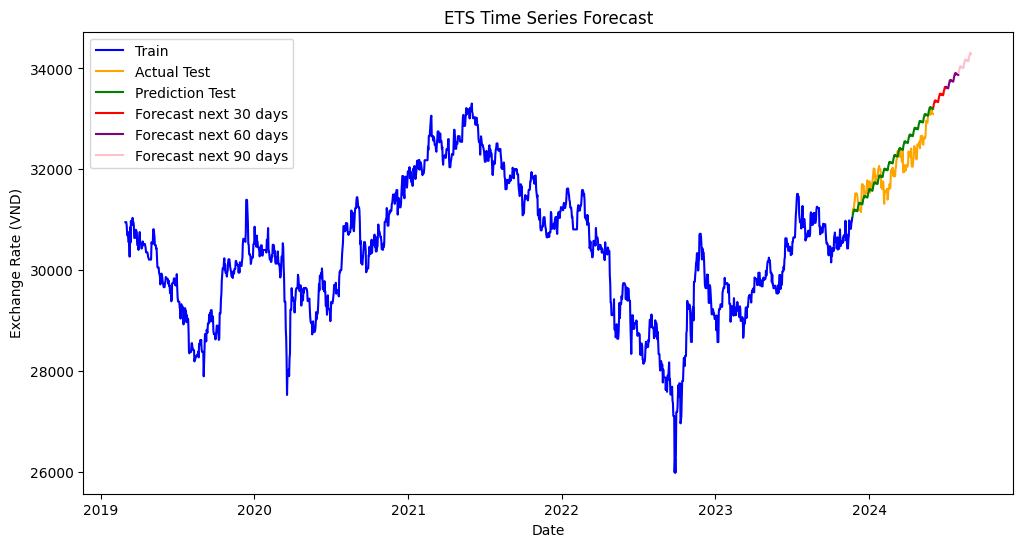

Model accuracy (GBP - 9:1)
RMSE = 314.8037068747822
MAPE = 0.8168142369763184
MAE = 261.5189707716151


In [72]:
predict_test_gbp_3, forecast_gbp_3_30, forecast_gbp_3_60, forecast_gbp_3_90 = predict_data_ETS(model_gbp_3, train_gbp_3, test_gbp_3)
visualise_ETS_model(train_gbp_3,test_gbp_3,predict_test_gbp_3,forecast_gbp_3_30, forecast_gbp_3_60, forecast_gbp_3_90)

print('Model accuracy (GBP - 9:1)')
accuracy(predict_test_gbp_3, test_gbp_3)